# Data Circle Notebook 4

This notebook will introduce other graphs you can use from other libraries. Specifically, this notebook will provide graph examples from **seaborn**

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("PittsTrees.csv")

/tmp/ipykernel_84/532623441.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("PittsTrees.csv")


## First start by importing seaborn

The website with functions is avalible here:
https://seaborn.pydata.org/generated/seaborn.objects.Plot.html

If importing it using the line below gives you troup

In [3]:
import seaborn as sns 

## Step 1: decide what columns you would like to use!

In [4]:
df.columns

Index(['_id', 'id', 'address_number', 'street', 'common_name',
       'scientific_name', 'height', 'width', 'growth_space_length',
       'growth_space_width', 'growth_space_type', 'diameter_base_height',
       'stems', 'overhead_utilities', 'land_use', 'condition',
       'stormwater_benefits_dollar_value', 'stormwater_benefits_runoff_elim',
       'property_value_benefits_dollarvalue',
       'property_value_benefits_leaf_surface_area',
       'energy_benefits_electricity_dollar_value',
       'energy_benefits_gas_dollar_value',
       'air_quality_benfits_o3dep_dollar_value',
       'air_quality_benfits_o3dep_lbs',
       'air_quality_benfits_vocavd_dollar_value',
       'air_quality_benfits_vocavd_lbs',
       'air_quality_benfits_no2dep_dollar_value',
       'air_quality_benfits_no2dep_lbs',
       'air_quality_benfits_no2avd_dollar_value',
       'air_quality_benfits_no2avd_lbs',
       'air_quality_benfits_so2dep_dollar_value',
       'air_quality_benfits_so2dep_lbs',
       'a

## Step 2: Make a mini data frame

In [5]:
quality_trees = df[['common_name', 'growth_space_type','air_quality_benfits_total_dollar_value']]
quality_trees

,common_name,growth_space_type,air_quality_benfits_total_dollar_value
0,Stump,Well or Pit,NaN
1,Linden: Littleleaf,Open or Unrestricted,11.457438
2,Maple: Red,Well or Pit,2.474653
3,Maple: Freeman,Well or Pit,3.865612
4,Maple: Norway,Open or Unrestricted,25.638395
...,...,...,...
45704,Maple: Norway,NaN,9.168813
45705,Maple: Sugar,NaN,2.222320
45706,Maple: Sugar,NaN,2.222320
45707,Maple: Sugar,NaN,2.222320


## Step 3: if you need, make more changes to your dataframe
For my graphs, I want to look at the distributions of air quality benefits for the top 8 most planted trees.

To do this I need to first get the list of the top 8 most planted trees (tree_types) and then have only those 8 trees be included in my new data frame.

In [7]:
tree_types = df[['common_name', 'id']].groupby('common_name').count().sort_values('id', ascending = False).iloc[0:8].reset_index().iloc[:,0]
tree_types

0             Maple: Norway
1                Maple: Red
2          London planetree
3             Pear: Callery
4         Vacant Site Small
5        Linden: Littleleaf
6    Honeylocust: Thornless
7                  Oak: Pin
Name: common_name, dtype: object

In [8]:
quality_trees = quality_trees[quality_trees['common_name'].isin(tree_types)].dropna()
quality_trees

,common_name,growth_space_type,air_quality_benfits_total_dollar_value
1,Linden: Littleleaf,Open or Unrestricted,11.457438
2,Maple: Red,Well or Pit,2.474653
4,Maple: Norway,Open or Unrestricted,25.638395
5,Oak: Pin,Tree Lawn or Parkway,15.696870
7,Maple: Norway,Tree Lawn or Parkway,8.501194
...,...,...,...
45255,Oak: Pin,Tree Lawn or Parkway,20.048095
45256,London planetree,Tree Lawn or Parkway,20.697540
45259,Linden: Littleleaf,Tree Lawn or Parkway,9.810397
45261,Maple: Norway,Open or Unrestricted,25.009977


## Step 4: Graph time!!
Here we are using the **seaborn violin plot** which allows us to compare distributions of different variables on the same graph. (https://seaborn.pydata.org/generated/seaborn.violinplot.html)

My graph could be used to see out of the top 8 trees which ones have the largest probability of supplying high air quality benefits. This information could be helpful in deciding which trees to plant more of. 

<Axes: xlabel='air_quality_benfits_total_dollar_value', ylabel='common_name'>

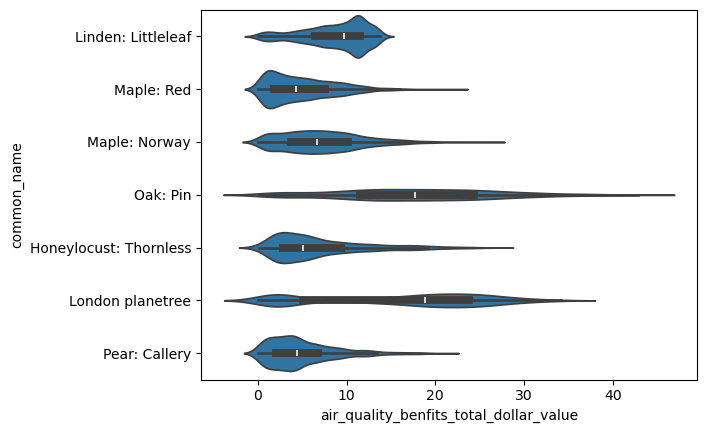

In [10]:
sns.violinplot(data = quality_trees, x = 'air_quality_benfits_total_dollar_value', y = 'common_name')

# Another graph example
Here is another useful seaborn plot: a **heatmap** (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

- It is useful for showing correlations between 2 different variables with a value measured in common. 

I am using a heatmap in this example to look at the resulting air quality benefits from the correlations in combinations of tree type and it's growth space type. This could help look at what combinations provide the highest air quality benefits. 

To start, I find the top most popular growth space types and then apply that to my new data frame.

In [11]:
space_types = df[['growth_space_type', 'id']].groupby('growth_space_type').count().sort_values('id', ascending = False).iloc[0:5].reset_index().iloc[:,0]
space_types

0    Open or Unrestricted
1             Well or Pit
2    Tree Lawn or Parkway
3      Open or Restricted
4                  Median
Name: growth_space_type, dtype: object

In [12]:
quality_trees = quality_trees[quality_trees['growth_space_type'].isin(space_types)]
quality_trees

,common_name,growth_space_type,air_quality_benfits_total_dollar_value
1,Linden: Littleleaf,Open or Unrestricted,11.457438
2,Maple: Red,Well or Pit,2.474653
4,Maple: Norway,Open or Unrestricted,25.638395
5,Oak: Pin,Tree Lawn or Parkway,15.696870
7,Maple: Norway,Tree Lawn or Parkway,8.501194
...,...,...,...
45255,Oak: Pin,Tree Lawn or Parkway,20.048095
45256,London planetree,Tree Lawn or Parkway,20.697540
45259,Linden: Littleleaf,Tree Lawn or Parkway,9.810397
45261,Maple: Norway,Open or Unrestricted,25.009977


 For heatmaps, you usually have to use groupby and pivot to get your data frame in the right format for the heatmap plot function.

In [13]:
heatmap_trees = quality_trees.groupby(['common_name', 'growth_space_type']).sum().reset_index()
heatmap_trees

,common_name,growth_space_type,air_quality_benfits_total_dollar_value
0,Honeylocust: Thornless,Median,305.120697
1,Honeylocust: Thornless,Open or Restricted,558.712018
2,Honeylocust: Thornless,Open or Unrestricted,4046.992743
3,Honeylocust: Thornless,Tree Lawn or Parkway,2137.254970
4,Honeylocust: Thornless,Well or Pit,6791.385138
5,Linden: Littleleaf,Median,12.780948
6,Linden: Littleleaf,Open or Restricted,303.153776
7,Linden: Littleleaf,Open or Unrestricted,7451.544173
8,Linden: Littleleaf,Tree Lawn or Parkway,8003.814383
9,Linden: Littleleaf,Well or Pit,4990.623057


In [14]:
heatmap_trees = heatmap_trees.pivot(values = 'air_quality_benfits_total_dollar_value', 
                                    columns = 'common_name', index = 'growth_space_type')
heatmap_trees

common_name,Honeylocust: Thornless,Linden: Littleleaf,London planetree,Maple: Norway,Maple: Red,Oak: Pin,Pear: Callery
growth_space_type,,,,,,,
Median,305.120697,12.780948,179.870760,71.659848,34.766394,75.486842,1013.645344
Open or Restricted,558.712018,303.153776,1342.294185,1003.367377,562.852842,477.064839,490.037870
Open or Unrestricted,4046.992743,7451.544173,21027.014459,12533.909670,3798.692707,18237.889433,2157.441867
Tree Lawn or Parkway,2137.254970,8003.814383,22907.218030,8030.053345,7073.785986,7142.280426,3850.703215
Well or Pit,6791.385138,4990.623057,5457.286274,4920.140394,5314.276411,3136.070576,7276.991851


## Graph time pt. 2 yay!!
Notice how heatmaps are just a color representation of what is shown in the table above.

An example of a conclusion you could make from this graph is 'Open or Unrestricted' space types provides the largest variety of air quality benifits across all trees. Or you could also say that we might want to plant more London Planetrees in tree lawns or parkways because that combination produces the highest overall air quality benifits. 

<Axes: xlabel='common_name', ylabel='growth_space_type'>

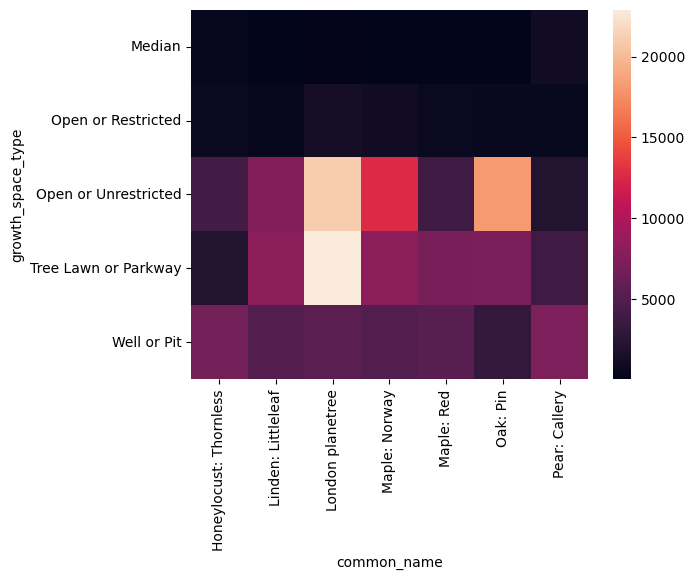

In [15]:
sns.heatmap(heatmap_trees)

## Now try it with your own dataset!
Check out more of their cool graphs here: https://seaborn.pydata.org/generated/seaborn.objects.Plot.html

If you are really loving graphs this is just the beginning, there are many more libraries where you can find more graph functions such as **Matplotlib**, **Plotly**, or **Geopandas**. We probably won't go into those unless you ask specifically for your project!